## EDA (análise exploratória e limpeza de dados)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leitura dos CSVs já realizada com as colunas de interesse para fins de economia de memória

In [2]:
cols = ["TransactionID", "card3", "card4", "card6", "V8", "V250"]
cols2 = ["TransactionID", "id-13", "id-17", "DeviceType"]
cols3 = ["TransactionID", "id_13", "id_17", "DeviceType"]

testID = pd.read_csv('test_identity.csv', usecols=cols2, index_col= 'TransactionID')
testTR = pd.read_csv('test_transaction.csv', usecols=cols, index_col= 'TransactionID')
trainID = pd.read_csv('train_identity.csv',usecols=cols3, index_col='TransactionID')
trainTR = pd.read_csv('train_transaction.csv', usecols=(cols + ["isFraud"]), index_col='TransactionID')

Análise inicial de ambos dataframes e da coluna alvo do desafio

In [3]:
trainID.head()

,id_13,id_17,DeviceType
TransactionID,,,
2987004,NaN,166.0,mobile
2987008,49.0,166.0,mobile
2987010,52.0,121.0,desktop
2987011,52.0,225.0,desktop
2987016,NaN,166.0,desktop


In [4]:
trainTR.head()

,isFraud,card3,card4,card6,V8,V250
TransactionID,,,,,,
2987000,0,150.0,discover,credit,1.0,NaN
2987001,0,150.0,mastercard,credit,NaN,NaN
2987002,0,150.0,visa,debit,1.0,NaN
2987003,0,150.0,mastercard,debit,NaN,NaN
2987004,0,150.0,mastercard,credit,NaN,1.0


In [5]:
trainTR.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

Adequação do nome das colunas do dataframe de teste e merge dos dataframes de transação e identificação

In [6]:
testID.rename(columns = {'id-17':'id_17','id-13':'id_13'}, inplace = True)

In [7]:
test = pd.concat([testTR, testID.reindex(testTR.index)], axis=1)
train = pd.concat([trainTR, trainID.reindex(trainTR.index)], axis=1)

Início da limpeza de dados, adequando strings para valores numéricos e preenchendo campos nulos

In [8]:
train.card3 = train.card3.fillna(0)
train.card6 = train.card6.apply(lambda x: 1 if x =="debit" else ( 2 if x == "credit" else 3))
train.card4 = train.card4.apply(lambda x: 1 if x == "visa" else(2 if x == "mastercard" else(3 if x == "discover" else 4)))
train.V250 = train.V250.fillna(0)
train.V8 = train.V8.fillna(0)
train.DeviceType = train.DeviceType.apply(lambda x: 1 if x == "mobile" else(2 if x == "desktop" else 3))
train.id_17 = train.id_17.fillna(0)
train.id_13 = train.id_13.fillna(0)

In [9]:
train.head()

,isFraud,card3,card4,card6,V8,V250,id_13,id_17,DeviceType
TransactionID,,,,,,,,,
2987000,0,150.0,3,2,1.0,0.0,0.0,0.0,3
2987001,0,150.0,2,2,0.0,0.0,0.0,0.0,3
2987002,0,150.0,1,1,1.0,0.0,0.0,0.0,3
2987003,0,150.0,2,1,0.0,0.0,0.0,0.0,3
2987004,0,150.0,2,2,0.0,1.0,0.0,166.0,1


Calculo aproximado da quantidade de fraudes presentes no dataframe

In [10]:
fraude = train[train['isFraud']==1]
nfraude = train[train['isFraud']==0]

print("Fraude: %i (%1.f%%)"%(len(fraude),float(len(fraude)/len(train))*100.0))
print("Não Fraude: %i (%1.f%%)"%(len(nfraude),float(len(nfraude)/len(train))*100.0))
print("Total: %i"%len(train))

Fraude: 20663 (3%)
Não Fraude: 569877 (97%)
Total: 590540


Plotagem de gráficos e cálculo de suas respectivas correlações com a coluna alvo para fins exploratórios

isFraud       0      1
card6                 
1        429264  10674
2        139036   9950
3          1577     39
0.09767431598675884


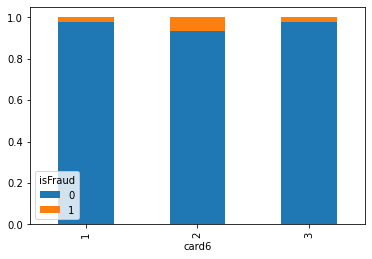

In [11]:
card6graph = pd.crosstab(train["card6"],train["isFraud"])
card6graph.div(card6graph.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print(card6graph)
print(train.card6.corr(train.isFraud))

isFraud       0      1
card4                 
1        371394  13373
2        182721   6496
3          6137    514
4          9625    280
0.003648482831702556


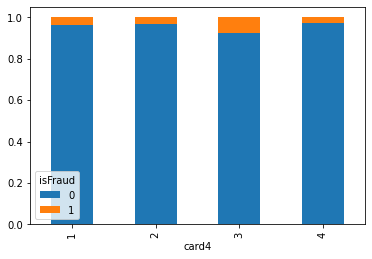

In [12]:
card4graph = pd.crosstab(train["card4"],train["isFraud"])
card4graph.div(card4graph.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print(card4graph)
print(train.card4.corr(train.isFraud))

0.12803480756935903

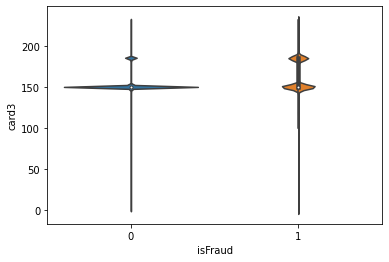

In [13]:
sns.violinplot(data = train, x = "isFraud", y = "card3")
train.card3.corr(train.isFraud)

-0.08316790656912587

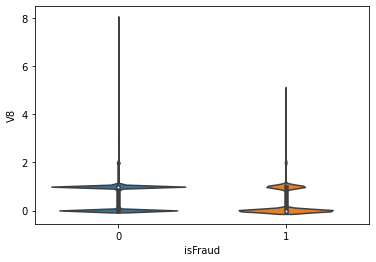

In [14]:
sns.violinplot(data = train, x = "isFraud", y = "V8")
train.V8.corr(train.isFraud)

0.1248900478724549

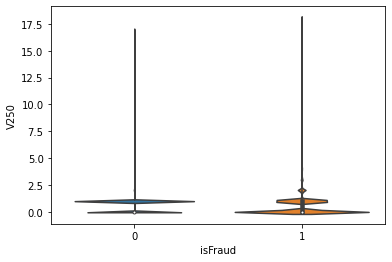

In [15]:
sns.violinplot(data = train, x = "isFraud", y = "V250")
train.V250.corr(train.isFraud)

0.12882394300484074

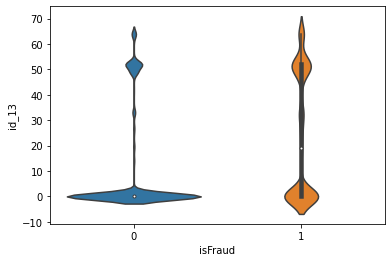

In [16]:
sns.violinplot(data = train, x = "isFraud", y = "id_13")
train.id_13.corr(train.isFraud)

0.15103647682694135

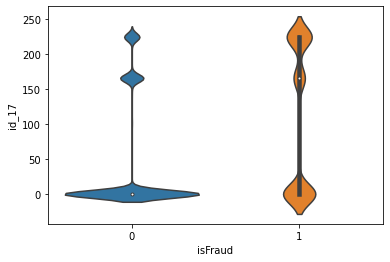

In [17]:
sns.violinplot(data = train, x = "isFraud", y = "id_17")
train.id_17.corr(train.isFraud)

<AxesSubplot: >

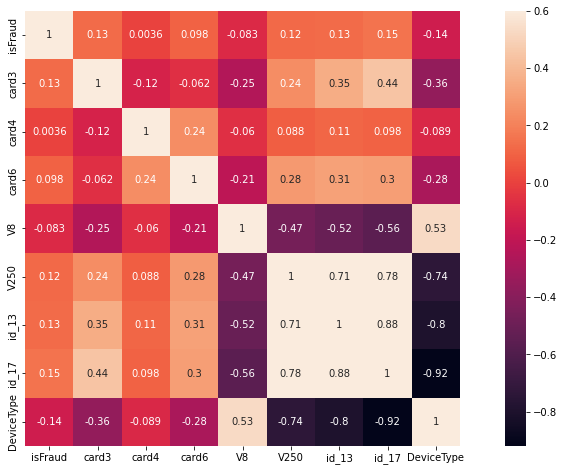

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(numeric_only=True), vmax=0.6, square=True, annot=True)

Balanceamento do dataframe selecionando colunas de não fraude de forma aleatória 

In [19]:
combfraude = train[train['isFraud']==1]
combnfraude = train[train['isFraud']==0].sample(n=20663)

trainSmp = pd.concat([combfraude, combnfraude])

In [20]:
trainSmp.head()

,isFraud,card3,card4,card6,V8,V250,id_13,id_17,DeviceType
TransactionID,,,,,,,,,
2987203,1,150.0,1,2,0.0,0.0,0.0,0.0,3
2987240,1,185.0,1,2,0.0,1.0,0.0,225.0,1
2987243,1,185.0,1,2,0.0,1.0,43.0,225.0,1
2987245,1,185.0,1,2,0.0,1.0,43.0,225.0,1
2987288,1,185.0,1,2,0.0,1.0,49.0,225.0,1


In [21]:
smpfraude = trainSmp[trainSmp['isFraud']==1]
smpnfraude = trainSmp[trainSmp['isFraud']==0]

print("Fraude: %i (%1.f%%)"%(len(smpfraude),float(len(smpfraude)/len(trainSmp))*100.0))
print("Não Fraude: %i (%1.f%%)"%(len(smpnfraude),float(len(smpnfraude)/len(trainSmp))*100.0))
print("Total: %i"%len(trainSmp))

Fraude: 20663 (50%)
Não Fraude: 20663 (50%)
Total: 41326


Plotagem de gráficos e cálculo de correlações após o balanceamento 

0.304612187555091

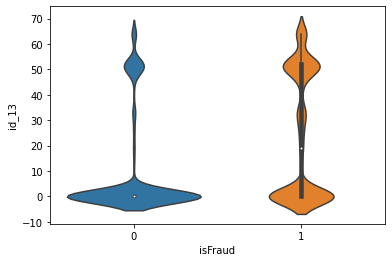

In [22]:
sns.violinplot(data = trainSmp, x = "isFraud", y = "id_13")
trainSmp.id_13.corr(trainSmp.isFraud)

0.34202523199211404

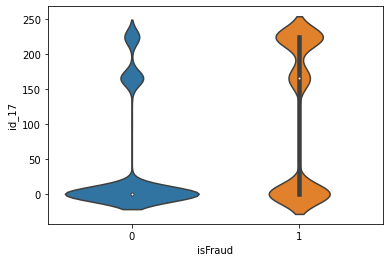

In [23]:
sns.violinplot(data = trainSmp, x = "isFraud", y = "id_17")
trainSmp.id_17.corr(trainSmp.isFraud)

-0.22344127379182707

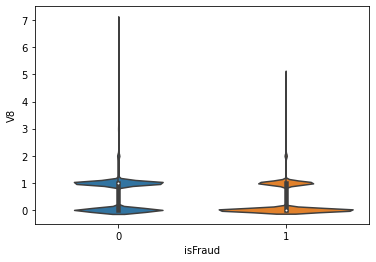

In [24]:
sns.violinplot(data = trainSmp, x = "isFraud", y = "V8")
trainSmp.V8.corr(trainSmp.isFraud)

0.22773645026897832

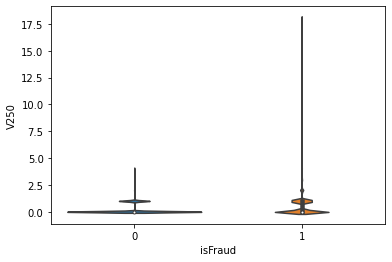

In [25]:
sns.violinplot(data = trainSmp, x = "isFraud", y = "V250")
trainSmp.V250.corr(trainSmp.isFraud)

0.2828127084615688

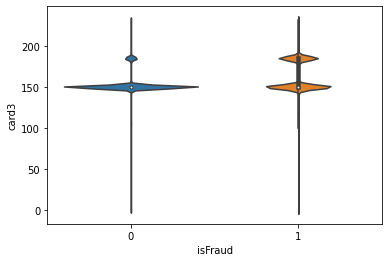

In [26]:
sns.violinplot(data = trainSmp, x = "isFraud", y = "card3")
trainSmp.card3.corr(trainSmp.isFraud)

isFraud      0      1
card4                
1        13474  13373
2         6604   6496
3          226    514
4          359    280
0.003648482831702556


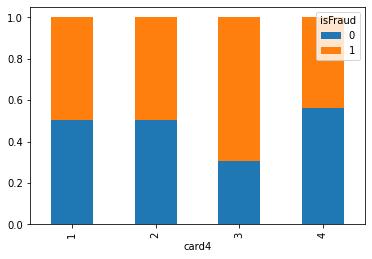

In [27]:
card4graph = pd.crosstab(trainSmp["card4"],trainSmp["isFraud"])
card4graph.div(card4graph.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print(card4graph)
print(train.card4.corr(train.isFraud))

isFraud      0      1
card6                
1        15609  10674
2         4996   9950
3           58     39
0.09767431598675884


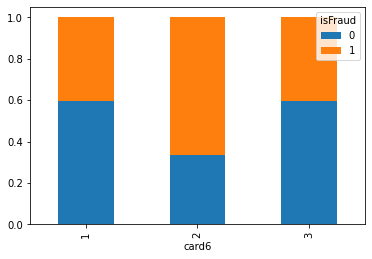

In [28]:
card6graph = pd.crosstab(trainSmp["card6"],trainSmp["isFraud"])
card6graph.div(card6graph.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
print(card6graph)
print(train.card6.corr(train.isFraud))

<AxesSubplot: >

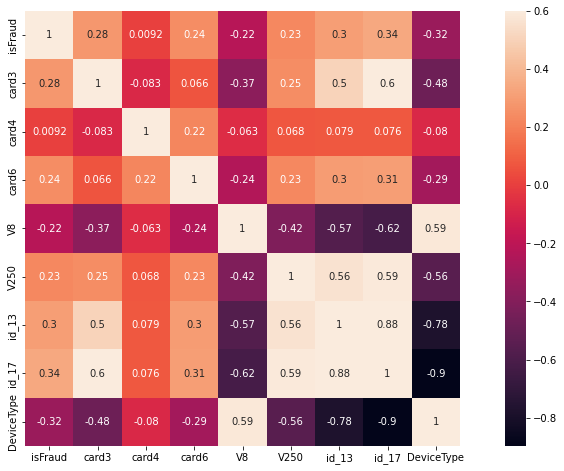

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(trainSmp.corr(numeric_only=True), vmax=0.6, square=True, annot=True)

## Machine Learning (predição a partir do modelo criado)

In [30]:
x_treino = trainSmp.drop("isFraud",axis=1)
y_treino = trainSmp["isFraud"]

x_teste = test

x_treino.shape,y_treino.shape,x_teste.shape

((41326, 8), (41326,), (506691, 8))

In [31]:
test.card3 = test.card3.fillna(0)
test.card6 = test.card6.apply(lambda x: 1 if x =="debit" else ( 2 if x == "credit" else 3))
test.card4 = test.card4.apply(lambda x: 1 if x == "visa" else(2 if x == "mastercard" else(3 if x == "discover" else 4)))
test.V250 = test.V250.fillna(0)
test.V8 = test.V8.fillna(0)
test.DeviceType = test.DeviceType.apply(lambda x: 1 if x == "mobile" else(2 if x == "desktop" else 3))
test.id_17 = test.id_17.fillna(0)
test.id_13 = test.id_13.fillna(0)

In [32]:
from sklearn.ensemble import RandomForestClassifier

predito = RandomForestClassifier()
predito.fit(x_treino,y_treino)

resultado = predito.predict(x_teste)
acuracia = round(predito.score(x_treino,y_treino)*100,2)
print(acuracia)

70.87


In [33]:
submissao = pd.DataFrame({
    "TransactionID":testTR.index,
    "isFraud":resultado
})

submissao.to_csv("submissao.csv",index=False)

In [34]:
submissao.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0


In [35]:
subfraude = submissao[submissao['isFraud']==1]
subnfraude = submissao[submissao['isFraud']==0]

print("Fraude: %i (%1.f%%)"%(len(subfraude),float(len(subfraude)/len(submissao))*100.0))
print("Não Fraude: %i (%1.f%%)"%(len(subnfraude),float(len(subnfraude)/len(submissao))*100.0))
print("Total: %i"%len(submissao))

Fraude: 129197 (25%)
Não Fraude: 377494 (75%)
Total: 506691
